In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import rdkit.Chem as Chem
from rdkit.Chem import Draw
from IPython.display import SVG

In [2]:
BASE = '../'

# data = pd.read_csv('../data/molbank/Img2Mol/staker/staker.csv')
data = pd.read_csv('../data/molbank/Img2Mol/valko.csv')
pred = pd.read_csv('../output/uspto/swin_base_aux_1m_new/prediction_valko.csv')
# data = pd.read_csv('../data/molbank/real-acs-evaluation/acs.csv')
# pred = pd.read_csv('../output/uspto/swin_base_aux_molcoords2/prediction_acs.csv')
# osra_pred = pd.read_csv('../data/molbank/Img2Mol/OCSR_Review/assets/results/UOB/molvec_15092020/prediction.csv')

--------------------
0
Img2Mol/valko/image1.tiff
gold: 
post: Cc1cc(Cc2cc(C)c(O)c(Cc3cc(C)cc(Cc4cc(Cc5cc(C)c(O)c(Cc6cc(Cc7cc(Cc8cc(C)cc(C)c8O)c(O)c(Cc8cc(C)cc(C)c8O)c7)cc(Cc7cc(C2)c1)c6O)c5)cc(C)c4O)c3O)c2)cc(c1O)c1O
pred: Cc1cc(Cc2cc(C)c(O)c(Cc3cc(C)cc(Cc4cc(Cc5cc(C)c(O)c(Cc6cc(Cc7cc(Cc8cc(C)cc(C)c8O)c(O)c(Cc8cc(C)cc(C)c8O)c7)cc(Cc7cc(C2)c1)c6O)c5)cc(C)c4O)c3O)c2)cc(c1O)c1O
(256, 256, 3)


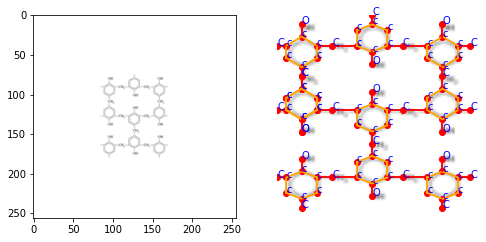

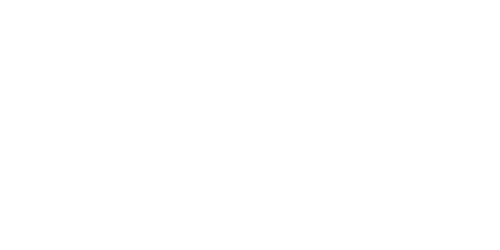

post: Cc1cc(Cc2cc(C)c(O)c(Cc3cc(C)cc(Cc4cc(Cc5cc(C)c(O)c(Cc6cc(Cc7cc(Cc8cc(C)cc(C)c8O)c(O)c(Cc8cc(C)cc(C)c8O)c7)cc(Cc7cc(C2)c1)c6O)c5)cc(C)c4O)c3O)c2)cc(c1O)c1O
graph: Cc1cc(C)c(O)c(Cc2cc(Cc3cc4c(O)c(c3)Cc3cc(cc(C)c3O)Cc3cc(C)c(O)c(c3)Cc3cc(C)cc(c3O)Cc3cc5(cc(C)c3O)Cc36cc7c89c(C)(cc(ccC4)C53)(c6)c7(O8)O9)cc(Cc3cc(C)cc(C)c3O)c2O)c1
--------------------
1
Img2Mol/valko/image10.tiff
gold: 
post: CCC(=CS(=O)(=O)c1ccc(C)cc1)C(=O)c1cc(F)c(Cl)nc1Cl
pred: [NHAc]C=C(C(C1C(Cl)=NC(Cl)=C(F)C=1)=O)<unk>C
(256, 256, 3)


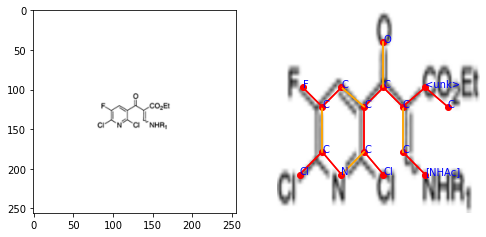

post: CCC(=CS(=O)(=O)c1ccc(C)cc1)C(=O)c1cc(F)c(Cl)nc1Cl
graph: C*C(=CNC(C)=O)C(=O)c1cc(F)c(Cl)nc1Cl
--------------------
2
Img2Mol/valko/image100.bmp
gold: 
post: CNC(=O)N(CCCN1CCC(N(Cc2cccs2)c2ccccc2)CC1)c1ccccc1
pred: CNC(N(C1C=CC=CC=1)CCCN1CCC(N(C2C=CC=CC=2)CC2SC=CC=2)CC1)=O
(256, 256, 3)


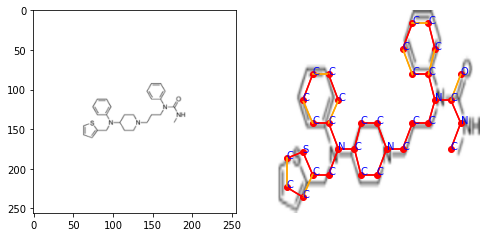

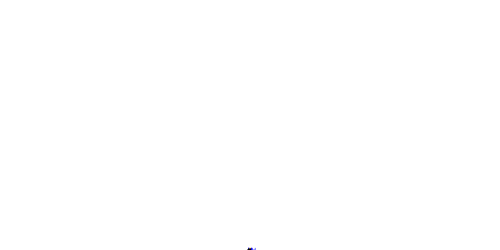

post: CNC(=O)N(CCCN1CCC(N(Cc2cccs2)c2ccccc2)CC1)c1ccccc1
graph: CNC(=O)N(CCCN1CCC(N(CC2=CC=CS2)C2=CC=CC=C2)CC1)C1=CC=CC=C1
--------------------
3
Img2Mol/valko/image101.bmp
gold: 
post: CCCCCCCCC=Cc1c(C)c(C=CCCCCCCCC)c2[n+](c1C)CCC2
pred: CCCCCCCC/C=C\C1C2CCC[N+]=2C(C)=C(/C=C\CCCCCCCC)C=1C
(256, 256, 3)


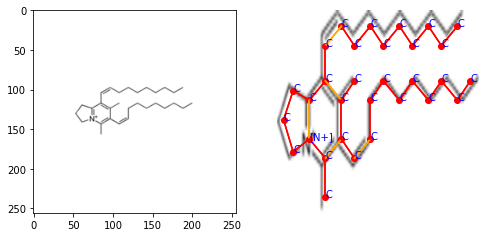

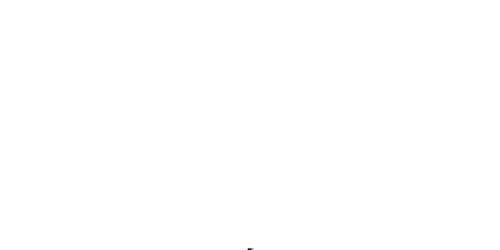

post: CCCCCCCC/C=C\c1c(C)c(/C=C\CCCCCCCC)c2[n+](c1C)CCC2
graph: CCCCCCCCC=CC1=C(C)C(C=CCCCCCCCC)=C(C)[N+]2=C1CCC2
--------------------
4
Img2Mol/valko/image102.bmp
gold: 
post: *c1ccccc1NC(=O)Nc1ccc(S(=O)(=O)c2ccc(C)cc2)cc1O
pred: C1C=CC(NC(NC2C(O)=CC([O2N])=CC=2)=O)=C([R])C=1
(256, 256, 3)


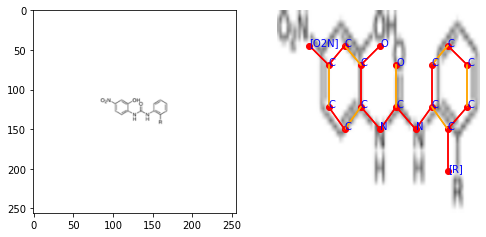

post: *c1ccccc1NC(=O)Nc1ccc(S(=O)(=O)c2ccc(C)cc2)cc1O
graph: *c1ccccc1NC(=O)Nc1ccc([N+](=O)[O-])cc1O
--------------------
5
Img2Mol/valko/image103.bmp
gold: 
post: Cc1ccc(NC(=O)Nc2ccccc2Br)c2[nH]nnc12
pred: C1C=C(NC(NC2C3NN=NC=3C(<unk>)=CC=2)=O)C(Br)=CC=1
(256, 256, 3)


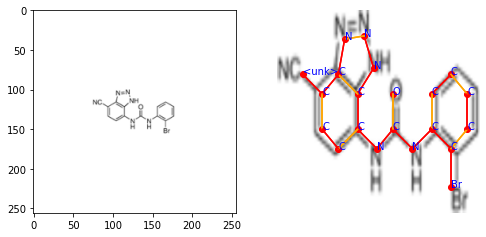

post: Cc1ccc(NC(=O)Nc2ccccc2Br)c2[nH]nnc12
graph: *C1=CC=C(NC(=O)NC2=CC=CC=C2Br)C2=C1N=NN2
--------------------
6
Img2Mol/valko/image104.bmp
gold: 
post: NSc1c(Cl)ccc(NC(=O)Nc2cccc(Cl)c2Cl)c1O
pred: C1C=C(Cl)C(Cl)=C(NC(NC2C=CC(Cl)=C(SN)C=2O)=O)C=1
(256, 256, 3)


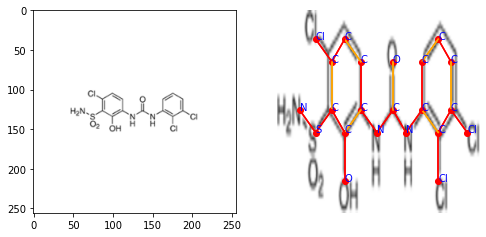

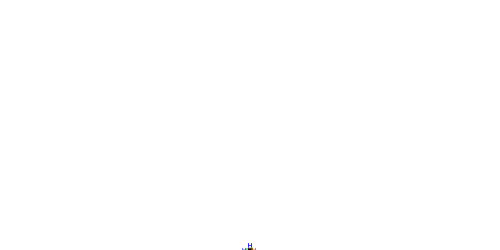

post: NSc1c(Cl)ccc(NC(=O)Nc2cccc(Cl)c2Cl)c1O
graph: NSC1=C(Cl)C=CC(NC(=O)NC2=C(Cl)C(Cl)=CC=C2)=C1O
--------------------
7
Img2Mol/valko/image105.bmp
gold: 
post: CCN(CC)CNc1nc2cc(Cl)c(Cl)cc2nc1-c1ccc(-c2cccs2)s1
pred: CCN(<unk>NC1C(C2SC(C3SC=CC=3)=CC=2)=NC2C(=CC(Cl)=C(Cl)C=2)N=1)CC
(256, 256, 3)


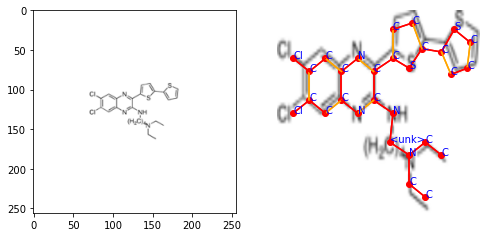

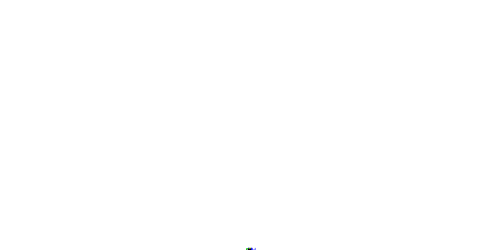

post: CCN(CC)CNc1nc2cc(Cl)c(Cl)cc2nc1-c1ccc(-c2cccs2)s1
graph: CCN(*NC1=NC2=CC(Cl)=C(Cl)C=C2N=C1C1=CC=C(C2=CC=CS2)S1)CC
--------------------
8
Img2Mol/valko/image106.bmp
gold: 
post: CCCCc1ncc(C=C(Cc2cccs2)C(=O)O)n1Cc1ccc(C(=O)O)c2ccccc12
pred: CCCCC1N(CC2C3C=CC=CC=3C(C(O)=O)=CC=2)C(/C=C(/C(O)=O)\CC2SC=CC=2)=CN=1
(256, 256, 3)


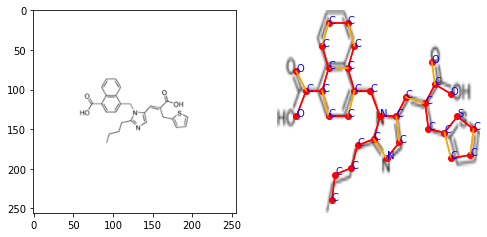

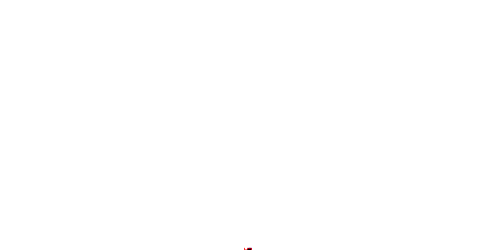

post: CCCCc1ncc(/C=C(\Cc2cccs2)C(=O)O)n1Cc1ccc(C(=O)O)c2ccccc12
graph: CCCCC1=NC=C(C=C(CC2=CC=CS2)C(=O)O)N1CC1=CC=C(C(=O)O)C2=C1C=CC=C2
--------------------
9
Img2Mol/valko/image107.bmp
gold: 
post: CCc1ccc(C(=O)Nc2ccc(F)cc2)c[n+]1[O-]
pred: C<unk>C1C=CC(C(NC2C=CC(F)=CC=2)=O)=C[N+]=1[O-]
(256, 256, 3)


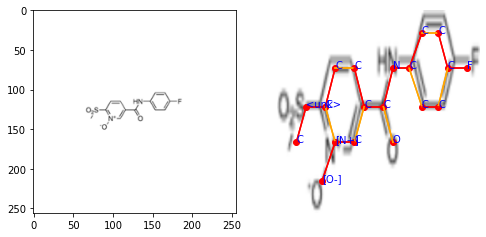

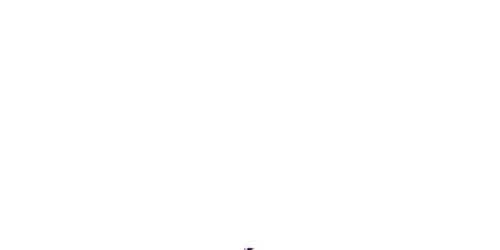

post: CCc1ccc(C(=O)Nc2ccc(F)cc2)c[n+]1[O-]
graph: C*C1=[N+]([O-])C=C(C(=O)NC2=CC=C(F)C=C2)C=C1
--------------------
10
Img2Mol/valko/image108.bmp
gold: 
post: COC(=O)CSc1ccc(C(=O)Nc2ccc(F)cc2)cn1
pred: C([MeO])(CSC1C=CC(C(NC2C=CC(F)=CC=2)=O)=CN=1)=O
(256, 256, 3)


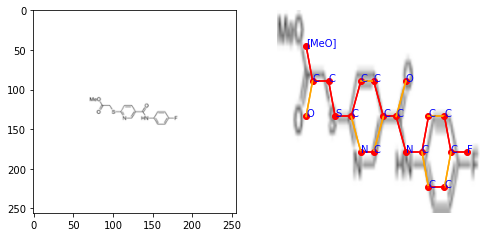

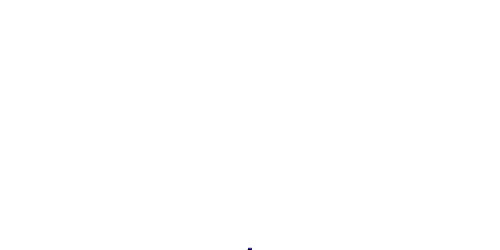

post: COC(=O)CSc1ccc(C(=O)Nc2ccc(F)cc2)cn1
graph: COC(=O)CSc1ccc(C(=O)Nc2ccc(F)cc2)cn1
--------------------
11
Img2Mol/valko/image109.bmp
gold: 
post: COc1cc2c(c(C)c1C)C(=O)c1nc3nonc3nc1-2
pred: CC1C(C)=C2C(C3C(C2=O)=NC2C(=NON=2)N=3)=CC=1[MeO]
(256, 256, 3)


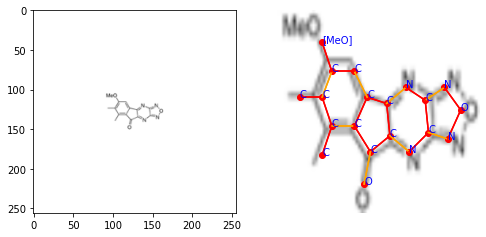

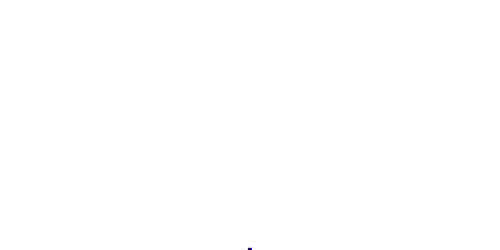

post: COc1cc2c(c(C)c1C)C(=O)c1nc3nonc3nc1-2
graph: COc1cc2c(c(C)c1C)C(=O)c1nc3nonc3nc1-2
--------------------
12
Img2Mol/valko/image11.tiff
gold: 
post: [MeS]C1=NC2=C(C=N1)C(=O)C([CO2Et][Et])=CN2C1SC=CN=1
pred: [MeS]C1=NC2=C(C=N1)C(=O)C([CO2Et][Et])=CN2C1SC=CN=1
(256, 256, 3)


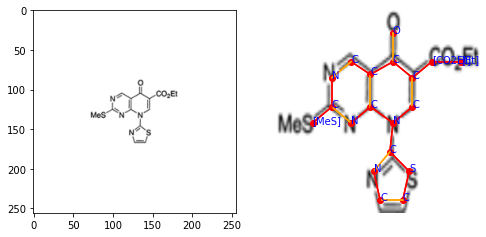

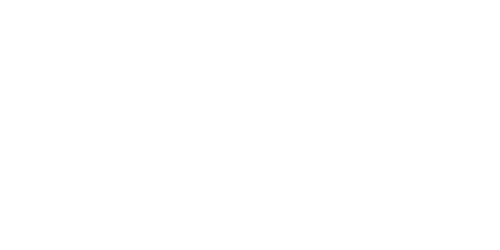

post: [MeS]C1=NC2=C(C=N1)C(=O)C([CO2Et][Et])=CN2C1SC=CN=1
graph: <invalid>
--------------------
13
Img2Mol/valko/image110.bmp
gold: 
post: CC(C)(CO)Nc1nc(SCc2ccccc2)nc2[nH]c(=O)sc12
pred: CC(NC1C2SC(NC=2N=C(SCC2C=CC=CC=2)N=1)=O)(CO)C
(256, 256, 3)


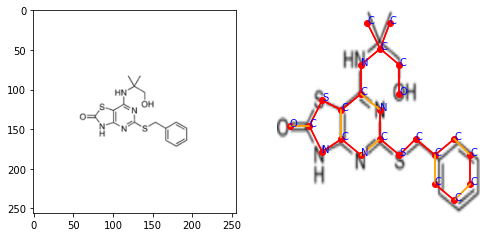

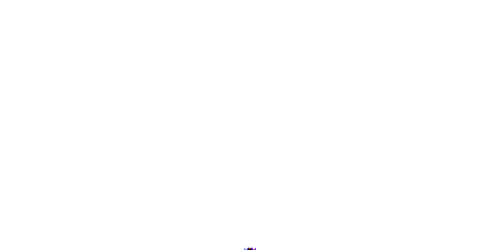

post: CC(C)(CO)Nc1nc(SCc2ccccc2)nc2[nH]c(=O)sc12
graph: CC(C)(CO)NC1=NC(SCC2=CC=CC=C2)=NC2=C1SC(=O)N2
--------------------
14
Img2Mol/valko/image111.bmp
gold: 
post: Cc1cccc(CSc2nc(NC(C)CO)c3sc(=O)[nH]c3n2)c1C
pred: CC1C(CSC2N=C(N[C@@H](CO)C)C3SC(NC=3N=2)=O)=CC=CC=1C
(256, 256, 3)


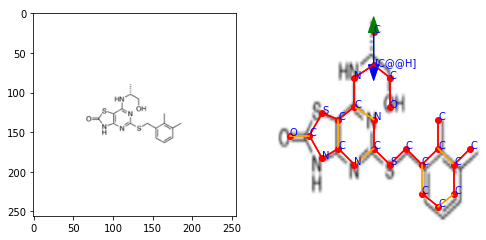

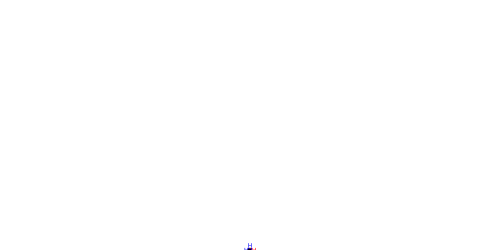

post: Cc1cccc(CSc2nc(N[C@H](C)CO)c3sc(=O)[nH]c3n2)c1C
graph: Cc1cccc(CSc2nc(N[C@H](C)CO)c3sc(=O)[nH]c3n2)c1C
--------------------
15
Img2Mol/valko/image112.bmp
gold: 
post: CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2ccccc2C(=O)O)cc1
pred: CCCC1N(CC2C=CC(C3C=CC=CC=3C(O)=O)=CC=2)C2C=C(C3N(C)C4C=CC=CC=4N=3)C=C(C)C=2N=1
(256, 256, 3)


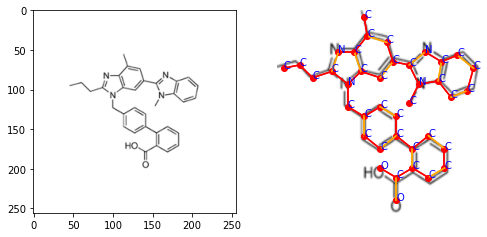

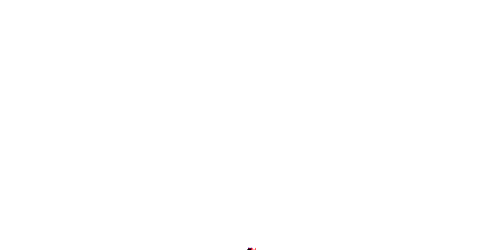

post: CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2ccccc2C(=O)O)cc1
graph: CCCC1=NC2=C(C=C(C3=NC4=C(C=CC=C4)N3C)C=C2C)N1CC1=CC=C(C2=C(C(=O)O)C=CC=C2)C=C1
--------------------
16
Img2Mol/valko/image113.bmp
gold: 
post: CC(C(=O)O)c1cccc(C(=O)c2ccccc2)c1
pred: C[C@@H]([COOH])C1C=CC=C(C(C2C=CC=CC=2)=O)C=1
(256, 256, 3)


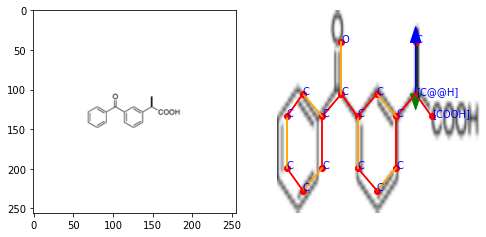

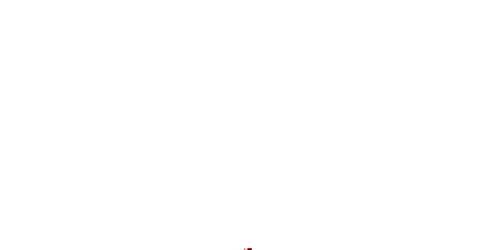

post: C[C@@H](C(=O)O)c1cccc(C(=O)c2ccccc2)c1
graph: C[C@@H](C(=O)O)c1cccc(C(=O)c2ccccc2)c1
--------------------
17
Img2Mol/valko/image114.bmp
gold: 
post: *c1ccc(-n2c(C(C)N(CCN(C)C)C(=O)CCCCCCCCC)nc3ccccc3c2=O)cc1
pred: CC(N(C(CCCCCCCCC)=O)CCN(C)C)C1N(C2C=CC([R])=CC=2)C(=O)C2C(=CC=CC=2)N=1
(256, 256, 3)


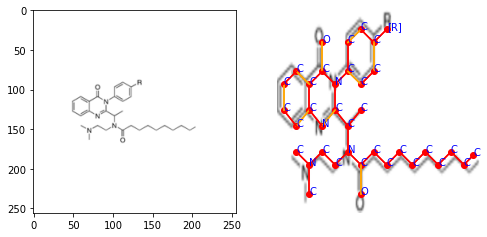

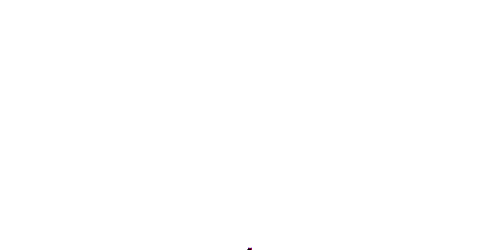

post: *c1ccc(-n2c(C(C)N(CCN(C)C)C(=O)CCCCCCCCC)nc3ccccc3c2=O)cc1
graph: *C1=CC=C(N2C(=O)C3=CC=CC=C3N=C2C(C)N(CCN(C)C)C(=O)CCCCCCCCC)C=C1
--------------------
18
Img2Mol/valko/image115.bmp
gold: 
post: CCOc1ccc(-n2c(C(C)N(Cc3ccccn3)C(=O)Cc3ccc(F)c(C(F)(F)F)c3)nc3ncccc3c2=O)cc1
pred: CCOC1C=CC(N2C([C@H](N(C(CC3C=CC(F)=C([F3C])C=3)=O)CC3C=CC=CN=3)C)=NC3C(=CC=CN=3)C2=O)=CC=1
(256, 256, 3)


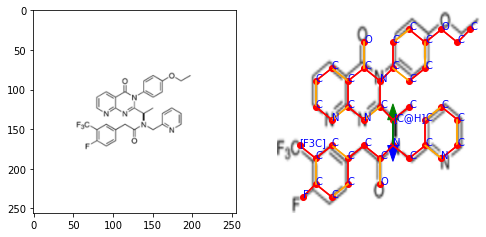

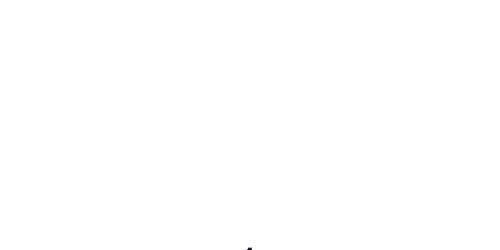

post: CCOc1ccc(-n2c([C@@H](C)N(Cc3ccccn3)C(=O)Cc3ccc(F)c(C(F)(F)F)c3)nc3ncccc3c2=O)cc1
graph: CCOc1ccc(-n2c([C@@H](C)N(Cc3ccccn3)C(=O)Cc3ccc(F)c(C(F)(F)F)c3)nc3ncccc3c2=O)cc1
--------------------
19
Img2Mol/valko/image116.bmp
gold: 
post: CCNCCCNCCNCCCN.CCNCCCNCCNCCCN
pred: C1CNCCNCCCN.C(CNCC[H])CNCCNCCCN.[H][C@H]([H])CNC1
(256, 256, 3)


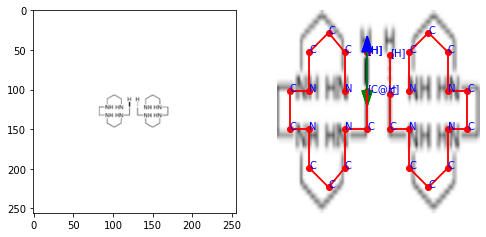

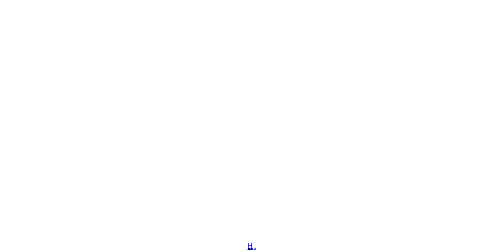

post: [H]C([H])CNCCCNCCNCCCN.[H]CCNCCCNCCNCCCN
graph: [H]C([H])CNCCCNCCNCCCN.[H]CCNCCCNCCNCCCN


In [4]:
from bms.chemistry import canonicalize_smiles, _expand_functional_group, _postprocess_smiles, _convert_graph_to_smiles
from bms.augment import CropWhite
import albumentations as A
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 600,600

transform = A.Compose([CropWhite(pad=0), A.Resize(384,384)])

cnt = 0 
for i, row in data.iterrows():
    gold_smiles,_ = canonicalize_smiles(row['SMILES'], ignore_chiral=True)
    post_smiles,_ = canonicalize_smiles(pred.loc[i,'post_SMILES'], ignore_chiral=True)
    pred_smiles = pred.loc[i,'SMILES']
#     assert osra_pred.loc[i, 'image_id'] == row['image_id']
#     osra_smiles, _ = canonicalize_smiles(osra_pred.loc[i, 'SMILES'], ignore_cistrans=True)
    if gold_smiles == post_smiles:
        continue
#     if osra_smiles != gold_smiles:
#         continue
#     pred_smiles = pred.loc[i,'SMILES']
    print('-' * 20)
    cnt += 1
    print(i)
    print(row['file_path'])
    print('gold:', gold_smiles)
    print('post:', post_smiles)
    print('pred:', pred_smiles)
#     print('osra:', osra_smiles, osra_smiles == gold_smiles)
    file = str(row['file_path'])
    path = BASE + file if file.startswith('data') else '../data/molbank/'+file
    image = cv2.imread(path)
    print(image.shape)
#     print(pred.loc[i,'molblock'])
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
#     plt.axis('off')
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.axis('off')
    img = transform(image=image)['image']
    plt.imshow(img)
    if 'node_coords' in pred.columns:
        coords = np.array(eval(pred.loc[i, 'node_coords']))
        symbols = eval(pred.loc[i, 'node_symbols'])
        edges = eval(pred.loc[i, 'edges'])
        h, w, _ = img.shape
        x, y = coords[:,0]*w, coords[:,1]*h
        plt.scatter(x, y, color='r', marker='o')
        for i in range(len(symbols)):
            plt.text(x[i], y[i], symbols[i], color='blue')
        for i in range(len(x)):
            for j in range(len(x)):
                if edges[i][j] != 0:
                    if edges[i][j] in [5, 6]:
                        color = 'blue' if edges[i][j] == 5 else 'green'
                        plt.arrow(x[i], y[i], x[j]-x[i], y[j]-y[i], color=color, head_width=20)
                    else:
                        color = 'red' if edges[i][j] == 1 else 'orange'
                        plt.plot([x[i], x[j]], [y[i], y[j]], color)
    plt.show()
    mol = Chem.MolFromSmiles(post_smiles)
    mol1 = Chem.MolFromSmiles(gold_smiles)
    svg = Draw.MolsToGridImage([mol1,mol], subImgSize=(250,250), molsPerRow=2, useSVG=True)
    display(svg)
    post_smiles, *_ =  _postprocess_smiles(pred_smiles, coords, symbols, edges, debug=False)
    print('post:', post_smiles)
    graph_smiles, _ = _convert_graph_to_smiles(coords, symbols, edges, debug=False)
    print('graph:', graph_smiles)
    if cnt == 20:
        break

In [ ]:
from bms.chemistry import canonicalize_smiles, _expand_functional_group, _postprocess_smiles, _convert_graph_to_smiles

for i, row in data.iterrows():
    pred_smiles = pred.loc[i,'SMILES']
    coords = np.array(eval(pred.loc[i, 'node_coords']))
    symbols = eval(pred.loc[i, 'node_symbols'])
    edges = eval(pred.loc[i, 'edges'])
    print(i, 'pred:', pred_smiles)
    post_smiles, *_ =  _postprocess_smiles(pred_smiles, coords, symbols, edges, debug=False)
    print(i, 'post:', post_smiles)

0 pred: Cc1cc(Cc2cc(C)c(O)c(Cc3cc(C)cc(Cc4cc(Cc5cc(C)c(O)c(Cc6cc(Cc7cc(Cc8cc(C)cc(C)c8O)c(O)c(Cc8cc(C)cc(C)c8O)c7)cc(Cc7cc(C2)c1)c6O)c5)cc(C)c4O)c3O)c2)cc(c1O)c1O
0 post: Cc1cc(Cc2cc(C)c(O)c(Cc3cc(C)cc(Cc4cc(Cc5cc(C)c(O)c(Cc6cc(Cc7cc(Cc8cc(C)cc(C)c8O)c(O)c(Cc8cc(C)cc(C)c8O)c7)cc(Cc7cc(C2)c1)c6O)c5)cc(C)c4O)c3O)c2)cc(c1O)c1O
1 pred: [NHAc]C=C(C(C1C(Cl)=NC(Cl)=C(F)C=1)=O)<unk>C
1 post: CCC(=CS(=O)(=O)c1ccc(C)cc1)C(=O)c1cc(F)c(Cl)nc1Cl
2 pred: CNC(N(C1C=CC=CC=1)CCCN1CCC(N(C2C=CC=CC=2)CC2SC=CC=2)CC1)=O
2 post: CNC(=O)N(CCCN1CCC(N(Cc2cccs2)c2ccccc2)CC1)c1ccccc1
3 pred: CCCCCCCC/C=C\C1C2CCC[N+]=2C(C)=C(/C=C\CCCCCCCC)C=1C
3 post: CCCCCCCC/C=C\c1c(C)c(/C=C\CCCCCCCC)c2[n+](c1C)CCC2
4 pred: C1C=CC(NC(NC2C(O)=CC([O2N])=CC=2)=O)=C([R])C=1
4 post: *c1ccccc1NC(=O)Nc1ccc(S(=O)(=O)c2ccc(C)cc2)cc1O
5 pred: C1C=C(NC(NC2C3NN=NC=3C(<unk>)=CC=2)=O)C(Br)=CC=1
5 post: Cc1ccc(NC(=O)Nc2ccccc2Br)c2[nH]nnc12
6 pred: C1C=C(Cl)C(Cl)=C(NC(NC2C=CC(Cl)=C(SN)C=2O)=O)C=1
6 post: NSc1c(Cl)ccc(NC(=O)Nc2cccc(Cl)c2Cl)c1O
7

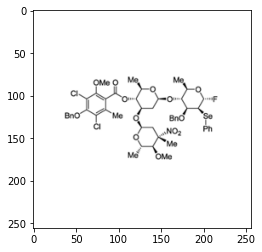

Gold: 
Pred: [Me][C@@H]1O[C@@H](C[C@H](O[C@@H]2O[C@@H]([Me])[C@H]([OMe])[C@@]([Me])([NO2])C2)[C@@H]1OC(C1C([Me])=C(Cl)C([MeO])=C(Cl)C=1[OMe])=O)O[C@@H]1[C@H]([OBn])[C@H]([Se][Ph])[C@@H](F)O[C@@H]1[Me]
Post: COc1c(Cl)c(C)c(C(=O)O[C@@H]2[C@@H](C)O[C@@H](O[C@H]3[C@H](OCc4ccccc4)[C@H]([Se]c4ccccc4)[C@@H](F)O[C@@H]3C)C[C@H]2O[C@H]2C[C@@](C)(S(=O)(=O)c3ccc(C)cc3)[C@@H](OC)[C@H](C)O2)c(OC)c1Cl


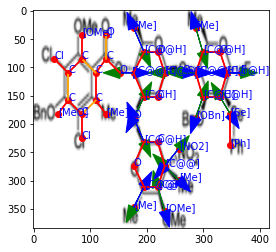

[(1, '?'), (3, '?'), (5, '?'), (7, '?'), (9, '?'), (11, '?'), (13, '?'), (17, '?'), (33, '?'), (34, '?'), (36, '?'), (39, '?'), (42, '?')]
[[0.46, 0.079], [0.508, 0.19], [0.571, 0.19], [0.603, 0.286], [0.571, 0.397], [0.508, 0.397], [0.46, 0.492], [0.508, 0.603], [0.46, 0.714], [0.508, 0.81], [0.46, 0.905], [0.571, 0.81], [0.603, 0.921], [0.603, 0.714], [0.667, 0.778], [0.667, 0.635], [0.571, 0.603], [0.46, 0.286], [0.397, 0.286], [0.333, 0.222], [0.286, 0.286], [0.286, 0.413], [0.333, 0.476], [0.222, 0.476], [0.222, 0.587], [0.159, 0.413], [0.111, 0.476], [0.159, 0.286], [0.095, 0.222], [0.222, 0.222], [0.222, 0.111], [0.333, 0.111], [0.683, 0.286], [0.746, 0.286], [0.778, 0.397], [0.746, 0.492], [0.857, 0.397], [0.905, 0.476], [0.905, 0.619], [0.889, 0.286], [0.952, 0.286], [0.857, 0.19], [0.778, 0.19], [0.746, 0.079]]
['[Me]', '[C@@H]', 'O', '[C@@H]', 'C', '[C@H]', 'O', '[C@@H]', 'O', '[C@@H]', '[Me]', '[C@H]', '[OMe]', '[C@@]', '[Me]', '[NO2]', 'C', '[C@@H]', 'O', 'C', 'C', 'C', '[

ValueError: Bad Conformer Id

In [3]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300
from bms.chemistry import _verify_chirality, _postprocess_smiles, _replace_functional_group, _convert_graph_to_smiles, canonicalize_smiles
from bms.augment import CropWhite
import albumentations as A

i = 261
gold_smiles = data.loc[i, 'SMILES']
if gold_smiles is None or type(gold_smiles) is not str:
    gold_smiles = ''
path = '../data/molbank/' + data.loc[i, 'file_path']
img = cv2.imread(path)
plt.imshow(img)
plt.show()
transform = A.Compose([CropWhite(pad=0), A.Resize(384,384)])
img = transform(image=img)['image']

pred_row = pred.loc[i]
pred_smiles = pred_row['SMILES']
post_smiles = pred_row['post_SMILES']

print('Gold:', canonicalize_smiles(gold_smiles)[0])
print('Pred:', pred_smiles)
print('Post:', post_smiles)

coords = eval(pred_row['node_coords'])
symbols = eval(pred_row['node_symbols'])
edges = eval(pred_row['edges'])

plt.imshow(img)
h,w,_ = img.shape
x, y = np.array(coords)[:,0]*w, np.array(coords)[:,1]*h
plt.scatter(x, y, color='r', marker='o')
for i in range(len(symbols)):
    plt.text(x[i], y[i], symbols[i], color='blue')
for i in range(len(x)):
    for j in range(len(x)):
        if edges[i][j] != 0:
            if edges[i][j] in [5, 6]:
                color = 'blue' if edges[i][j] == 5 else 'green'
                plt.arrow(x[i], y[i], x[j]-x[i], y[j]-y[i], color=color, head_width=20)
            else:
                if edges[i][j] == 1:
                    color = 'red'
                elif edges[i][j] == 2:
                    color = 'orange'
                else:
                    color = 'yellow'
                plt.plot([x[i], x[j]], [y[i], y[j]], color)
plt.show()

mol_gold = Chem.MolFromSmiles(gold_smiles)
pred_smiles = pred_smiles.replace('@', '').replace('/', '').replace('\\', '')
pred_smiles, mappings = _replace_functional_group(pred_smiles)
mol_pred = Chem.MolFromSmiles(pred_smiles)
mol_post = Chem.MolFromSmiles(post_smiles)
img = Chem.Draw.MolsToGridImage([mol_gold,mol_pred,mol_post], subImgSize=(250,250), molsPerRow=3, useSVG=True)
display(img)
if mol_pred is not None:
    chiral_centers = Chem.FindMolChiralCenters(mol_pred, includeUnassigned=True, includeCIP=False, useLegacyImplementation=False)
    print(chiral_centers)

print(coords)
print(symbols)
print(edges)

# n = len(coords)
# for s in range(n):
#     for t in range(s+1, n):
#         if edges[s][t] != 0:
#             print(symbols[s], symbols[t], edges[s][t])

pred_smiles = pred_row['SMILES']
smiles, mol = _postprocess_smiles(pred_smiles, coords, symbols, edges, debug=True)
print('post:', smiles)

print('graph:', _convert_graph_to_smiles(coords, symbols, edges, debug=True))